<a href="https://colab.research.google.com/github/obaniah/Assignment-4-CS-4783-5783---oday-bani-ahmad/blob/main/Q2_Assignment_4_CS_4783_5783_Oday_Bani_Ahmad_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using the same housing data (Asssignment4_Data.xlsx), construct a decision tree classifier. You 
can use the implementation available on Sci-Kit Learn. Perform the following experiments and 
briefly (2-4 sentences) answer the questions. 

In [ ]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd

train = pd.read_csv('Train_Asssignment4_Data.csv')
train

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,1,4.9176,1.0,3.4720,0.998,1.0,7,4,42,Apartment
1,2,5.0208,1.0,3.5310,1.500,2.0,7,4,62,House
2,3,4.5429,1.0,2.2750,1.175,1.0,6,3,40,Condo
3,4,4.5573,1.0,4.0500,1.232,1.0,6,3,54,Apartment
4,5,5.0597,1.0,4.4550,1.121,1.0,6,3,42,Apartment
5,6,3.8910,1.0,4.4550,0.988,1.0,6,3,56,Condo
6,7,5.8980,1.0,5.8500,1.240,1.0,7,3,51,Condo
7,8,5.6039,1.0,9.5200,1.501,0.0,6,3,32,House
8,9,16.4202,2.5,9.8000,3.420,2.0,10,5,42,Condo
9,10,14.4598,2.5,12.8000,3.000,2.0,9,5,14,Apartment


In [ ]:
#x_train = train.drop("House ID", axis='columns')


In [ ]:
x_train = train.iloc[ : , :-1]
x_train

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home
0,1,4.9176,1.0,3.4720,0.998,1.0,7,4,42
1,2,5.0208,1.0,3.5310,1.500,2.0,7,4,62
2,3,4.5429,1.0,2.2750,1.175,1.0,6,3,40
3,4,4.5573,1.0,4.0500,1.232,1.0,6,3,54
4,5,5.0597,1.0,4.4550,1.121,1.0,6,3,42
5,6,3.8910,1.0,4.4550,0.988,1.0,6,3,56
6,7,5.8980,1.0,5.8500,1.240,1.0,7,3,51
7,8,5.6039,1.0,9.5200,1.501,0.0,6,3,32
8,9,16.4202,2.5,9.8000,3.420,2.0,10,5,42
9,10,14.4598,2.5,12.8000,3.000,2.0,9,5,14


In [ ]:
y_train = train.iloc[: , -1]
y_train

0     Apartment
1         House
2         Condo
3     Apartment
4     Apartment
5         Condo
6         Condo
7         House
8         Condo
9     Apartment
10        House
11        House
12        House
13        Condo
14    Apartment
15        House
16    Apartment
17        House
18        Condo
19    Apartment
Name: Construction type, dtype: object

In [ ]:
test = pd.read_csv('Test_Asssignment4_Data.csv')

In [ ]:
#x_test = test.drop("House ID", axis='columns')

In [ ]:
x_test = test.iloc[ : , : -1]
x_test

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home
0,24,6.0931,1.5,6.7265,1.652,1.0,6,3,44
1,25,8.3607,1.5,9.1500,1.777,2.0,8,4,48
2,26,8.1400,1.0,8.0000,1.504,2.0,7,3,3
3,27,9.1416,1.5,7.3262,1.831,1.5,8,4,31
4,28,12.0000,1.5,5.0000,1.200,2.0,6,3,30


In [ ]:
y_test = test.iloc[ : , -1]
y_test

0    Apartment
1        House
2        House
3    Apartment
4    Apartment
Name: Construction type, dtype: object

In [ ]:
features = x_train.columns

In [ ]:
train['Construction type'].value_counts()

Apartment    7
House        7
Condo        6
Name: Construction type, dtype: int64

In [ ]:
x_train

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home
0,1,4.9176,1.0,3.4720,0.998,1.0,7,4,42
1,2,5.0208,1.0,3.5310,1.500,2.0,7,4,62
2,3,4.5429,1.0,2.2750,1.175,1.0,6,3,40
3,4,4.5573,1.0,4.0500,1.232,1.0,6,3,54
4,5,5.0597,1.0,4.4550,1.121,1.0,6,3,42
5,6,3.8910,1.0,4.4550,0.988,1.0,6,3,56
6,7,5.8980,1.0,5.8500,1.240,1.0,7,3,51
7,8,5.6039,1.0,9.5200,1.501,0.0,6,3,32
8,9,16.4202,2.5,9.8000,3.420,2.0,10,5,42
9,10,14.4598,2.5,12.8000,3.000,2.0,9,5,14


In [ ]:
y_train

0     Apartment
1         House
2         Condo
3     Apartment
4     Apartment
5         Condo
6         Condo
7         House
8         Condo
9     Apartment
10        House
11        House
12        House
13        Condo
14    Apartment
15        House
16    Apartment
17        House
18        Condo
19    Apartment
Name: Construction type, dtype: object

In [ ]:
x_test

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home
0,24,6.0931,1.5,6.7265,1.652,1.0,6,3,44
1,25,8.3607,1.5,9.1500,1.777,2.0,8,4,48
2,26,8.1400,1.0,8.0000,1.504,2.0,7,3,3
3,27,9.1416,1.5,7.3262,1.831,1.5,8,4,31
4,28,12.0000,1.5,5.0000,1.200,2.0,6,3,30


In [ ]:
y_test

0    Apartment
1        House
2        House
3    Apartment
4    Apartment
Name: Construction type, dtype: object

1. Use the default parameters.  


In [ ]:
from sklearn import tree
clf_DecisionTreeClassifier=DecisionTreeClassifier()
clf_DecisionTreeClassifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
print(clf_DecisionTreeClassifier.tree_.max_depth)


5


In [ ]:
y_pred_DT= clf_DecisionTreeClassifier.predict(x_train)

Q2  1 a. What is the accuracy on the training set?

In [ ]:
accuracy_on_the_training_set = accuracy_score(y_train,y_pred_DT)
accuracy_on_the_training_set

1.0

Q2  1 b.What is the accuracy on the test set?

In [ ]:
y_pred_DT= clf_DecisionTreeClassifier.predict(x_test)

In [ ]:
accuracy_on_the_test_set = accuracy_score(y_test,y_pred_DT)
accuracy_on_the_test_set

0.4

Q2 2. What is the effect of restricting the maximum depth of the tree? Try different depths and 
find the best value. 

The defult Depth was 5 and by restriction it, the best output was with depth = 2, since the accuracy increased to .6

depth = 4

In [ ]:
clf_DecisionTreeClassifier=DecisionTreeClassifier(max_depth= 4 )
clf_DecisionTreeClassifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
y_pred_DT= clf_DecisionTreeClassifier.predict(x_test)

In [ ]:
accuracy_on_the_test_set = accuracy_score(y_test,y_pred_DT)
accuracy_on_the_test_set

0.4

In [ ]:
text_representation = tree.export_text(clf_DecisionTreeClassifier)

In [ ]:
print(text_representation)

|--- feature_8 <= 36.00
|   |--- feature_1 <= 8.41
|   |   |--- feature_8 <= 19.50
|   |   |   |--- class: Condo
|   |   |--- feature_8 >  19.50
|   |   |   |--- feature_4 <= 1.17
|   |   |   |   |--- class: Condo
|   |   |   |--- feature_4 >  1.17
|   |   |   |   |--- class: House
|   |--- feature_1 >  8.41
|   |   |--- class: Apartment
|--- feature_8 >  36.00
|   |--- feature_3 <= 5.50
|   |   |--- feature_1 <= 4.55
|   |   |   |--- class: Condo
|   |   |--- feature_1 >  4.55
|   |   |   |--- feature_8 <= 58.00
|   |   |   |   |--- class: Apartment
|   |   |   |--- feature_8 >  58.00
|   |   |   |   |--- class: House
|   |--- feature_3 >  5.50
|   |   |--- class: Condo



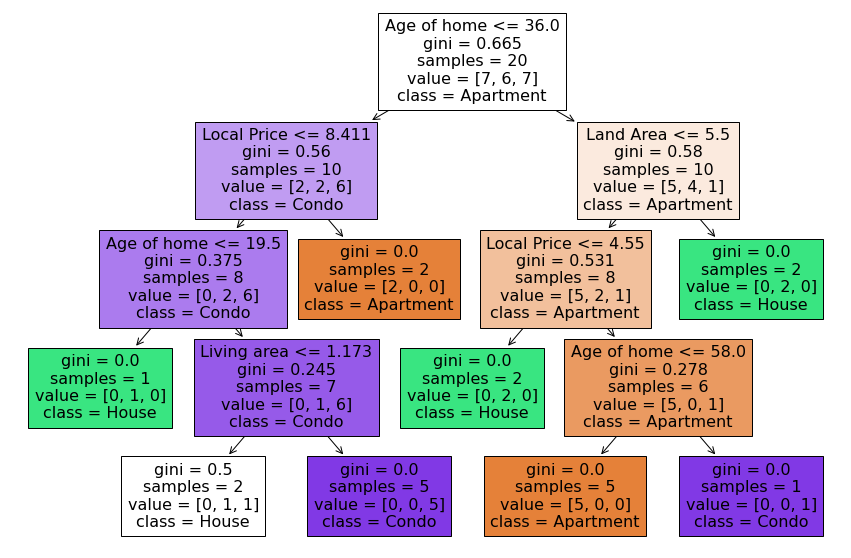

In [ ]:
#Decision Tree represented in a Plot    
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf_DecisionTreeClassifier,
feature_names=features,
class_names=train['Construction type'],
filled=True)
fig.savefig("decistion_tree.png")

depth = 3 

In [ ]:
clf_DecisionTreeClassifier=DecisionTreeClassifier(max_depth= 3 )
clf_DecisionTreeClassifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred_DT= clf_DecisionTreeClassifier.predict(x_test)

In [ ]:
accuracy_on_the_test_set = accuracy_score(y_test,y_pred_DT)
accuracy_on_the_test_set

0.4

In [ ]:
text_representation = tree.export_text(clf_DecisionTreeClassifier)

In [ ]:
print(text_representation)

|--- feature_8 <= 36.00
|   |--- feature_1 <= 8.41
|   |   |--- feature_8 <= 19.50
|   |   |   |--- class: Condo
|   |   |--- feature_8 >  19.50
|   |   |   |--- class: House
|   |--- feature_1 >  8.41
|   |   |--- class: Apartment
|--- feature_8 >  36.00
|   |--- feature_1 <= 4.55
|   |   |--- class: Condo
|   |--- feature_1 >  4.55
|   |   |--- feature_3 <= 5.50
|   |   |   |--- class: Apartment
|   |   |--- feature_3 >  5.50
|   |   |   |--- class: Condo



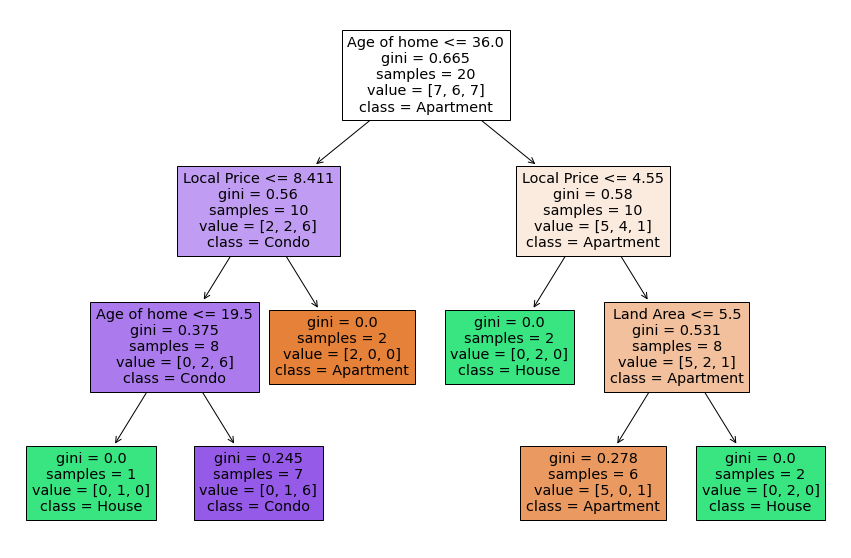

In [ ]:
#Decision Tree represented in a Plot    
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf_DecisionTreeClassifier,
feature_names=features,
class_names=train['Construction type'],
filled=True)
fig.savefig("decistion_tree.png")

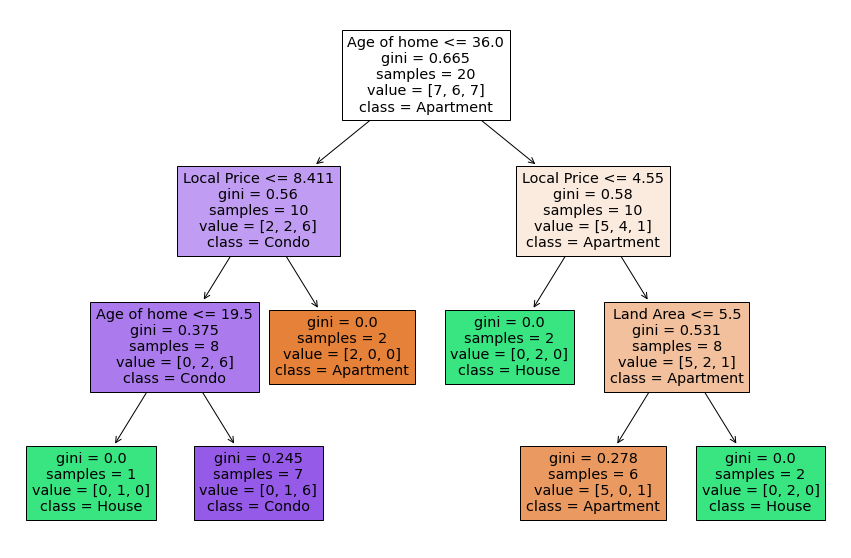

In [ ]:
#Decision Tree represented in a Plot    
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf_DecisionTreeClassifier,
feature_names=features,
class_names=train['Construction type'],
filled=True)
fig.savefig("decistion_tree.png")

depth = 1

In [ ]:
clf_DecisionTreeClassifier=DecisionTreeClassifier(max_depth= 1 )
clf_DecisionTreeClassifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [ ]:
y_pred_DT= clf_DecisionTreeClassifier.predict(x_test)

In [ ]:
accuracy_on_the_test_set = accuracy_score(y_test,y_pred_DT)
accuracy_on_the_test_set

0.4

In [ ]:
text_representation = tree.export_text(clf_DecisionTreeClassifier)

In [ ]:
print(text_representation)

|--- feature_8 <= 36.00
|   |--- class: House
|--- feature_8 >  36.00
|   |--- class: Apartment



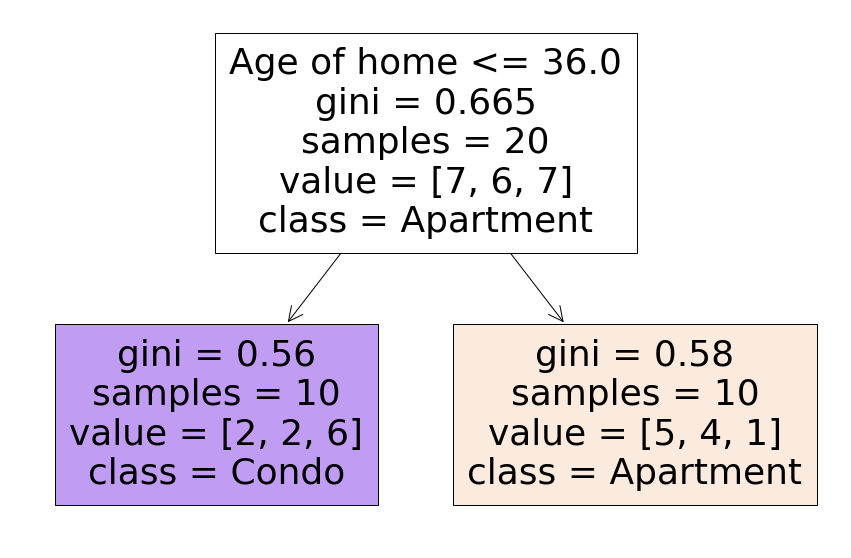

In [ ]:
#Decision Tree represented in a Plot    
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf_DecisionTreeClassifier,
feature_names=features,
class_names=train['Construction type'],
filled=True)
fig.savefig("decistion_tree.png")

depth = 2

In [ ]:
clf_DecisionTreeClassifier=DecisionTreeClassifier(criterion='entropy'  ,max_depth= 2 )
clf_DecisionTreeClassifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [ ]:
y_pred_DT= clf_DecisionTreeClassifier.predict(x_test)

In [ ]:
accuracy_on_the_test_set = accuracy_score(y_test,y_pred_DT)
accuracy_on_the_test_set

0.8

In [ ]:
text_representation = tree.export_text(clf_DecisionTreeClassifier)

In [ ]:
print(text_representation)

|--- feature_8 <= 36.00
|   |--- feature_1 <= 8.41
|   |   |--- class: House
|   |--- feature_1 >  8.41
|   |   |--- class: Apartment
|--- feature_8 >  36.00
|   |--- feature_8 <= 59.00
|   |   |--- class: Apartment
|   |--- feature_8 >  59.00
|   |   |--- class: House



Q2 3. Why does restricting the depth have such a strong effect on the classifier performance?

One of the main causes of overfitting in decision trees is that  model will fit properly for the training data but will not be able to generalize effectively on the test set since it will have more splits and it will capture more information about the data as the tree becomes deeper. Therefore, if the model is overfitting, lowering the value for max depth is one method to do it.

In order to get the ideal value, experiment since overfitting and underfitting are very subjective to a dataset; there is no one value that fits all solution. It is also terrible to have a very low depth because the model would underfit. then what

Q2 4.Visualize the resulting tree. Perform the inference on this tree manually (i.e. show/trace 
the path taken towards classification) and provide a classification for the following 
example: 
 
Local Price  9.0384 

Bathrooms  1 

Land Area  7.8 

Living area  1.5 

Garages  1.5 

Rooms  7 

Bedrooms  3 

Age of home  23 

In [ ]:
sample = {'House ID':'30' , 'Local Price': '9.0384','Bathrooms': '1','Land Area': '7.8','Living area': '1.5' , 'Garages': '1.5','Rooms':'7' ,'Bedrooms': '3' ,'Age of home': '23' }


In [ ]:
sample = pd.DataFrame([sample])

In [ ]:
sample

,House ID,Local Price,Bathrooms,Land Area,Living area,Garages,Rooms,Bedrooms,Age of home
0,30,9.0384,1,7.8,1.5,1.5,7,3,23


In [ ]:
y_pred_DT= clf_DecisionTreeClassifier.predict(sample)
y_pred_DT

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Bedrooms
- Garages
- Rooms
Feature names seen at fit time, yet now missing:
- # Bedrooms
- # Garages
- # Rooms

  warnings.warn(message, FutureWarning)


array(['Apartment'], dtype=object)

In [ ]:
y_pred_DT

array(['Apartment'], dtype=object)

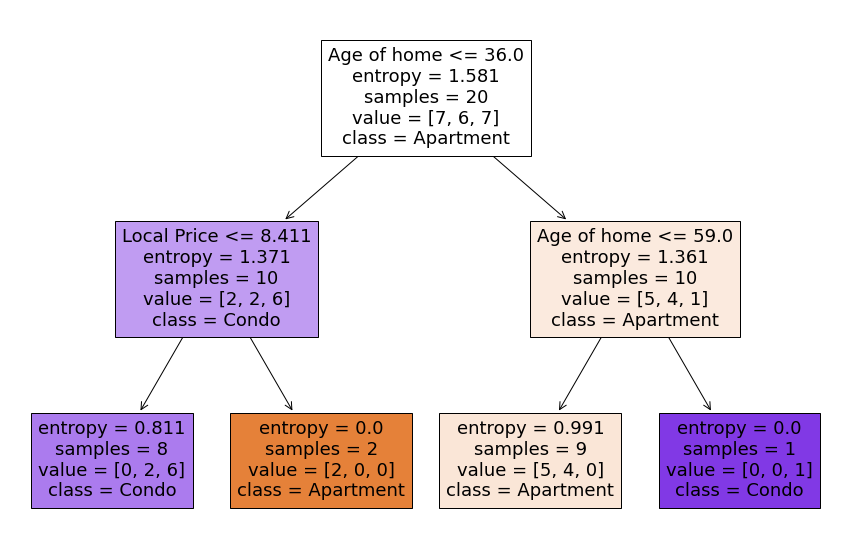

In [ ]:
#Decision Tree represented in a Plot    
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf_DecisionTreeClassifier,
feature_names=features,
class_names=train['Construction type'],
filled=True)
fig.savefig("decistion_tree.png")

In [ ]:
text_representation = tree.export_text(clf_DecisionTreeClassifier)

In [ ]:
print(text_representation)

|--- feature_8 <= 36.00
|   |--- feature_1 <= 8.41
|   |   |--- class: House
|   |--- feature_1 >  8.41
|   |   |--- class: Apartment
|--- feature_8 >  36.00
|   |--- feature_8 <= 59.00
|   |   |--- class: Apartment
|   |--- feature_8 >  59.00
|   |   |--- class: House



**--- Age of home <= 36.00
--- Local Price >  8.41
|   |   |--- class: Apartment**